In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [4]:
noise

array([ 0.48179691, -0.25468256,  0.78146925, ..., -0.7375133 ,
       -0.96047576,  0.73878816])

y = mx + b
b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [8]:
my_data = pd.concat([x_df, y_df], axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,5.481797
1,0.00001,4.745322
2,0.00002,5.781479
3,0.00003,6.223030
4,0.00004,4.403782


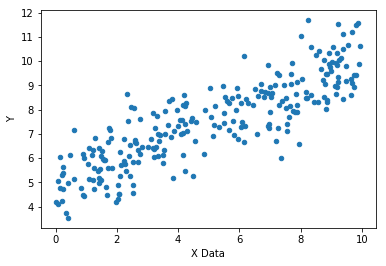

In [13]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [14]:
batch_size = 8

In [15]:

m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [16]:
xph = tf.placeholder(tf.float32, [batch_size])

In [21]:
yph = tf.placeholder(tf.float32, [batch_size])

In [19]:
y_model = m*xph + b

In [22]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [24]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b])

In [32]:
y_hat = x_data*model_m + model_b

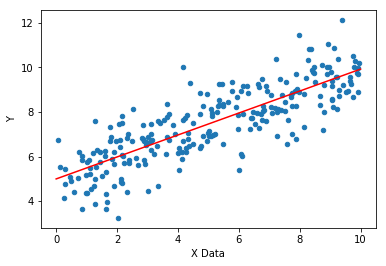

In [34]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')